# EDA for time series data

In [1]:
import os
import zipfile
import requests
import pandas as pd
import matplotlib.pylab as plt

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
FILE_PATH = "AirQualityUCI.zip"
DIRECTORY_PATH = "air_quality"

def fetch_data(url, fname):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(url)
    outpath  = os.path.abspath(fname)
    with open(outpath, "wb") as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data(URL, FILE_PATH)

# Unzip the data
with zipfile.ZipFile(FILE_PATH, "r") as zip_ref:
    zip_ref.extractall(DIRECTORY_PATH)

## Use Pandas to load the data

Check the first few rows, look at summary stats

In [4]:
cols = [
    "Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)",
    "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)",
    "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"
]

air_df = pd.read_csv(
    os.path.join(DIRECTORY_PATH, "AirQualityUCI.csv"),
    sep=";",
    usecols=cols,
)

In [5]:
# replace slash in Date with dashes
air_df["Date"] = air_df["Date"].str.replace("/", "-")

# replace period in Time with colons
air_df["Time"] = air_df["Time"].str.replace(".", ":")

# create a timestamp column
air_df["Timestamp"] = air_df["Date"] + " " + air_df["Time"]

# drop the columns we don't need anymore
air_df = air_df.drop(columns=["Date", "Time"])

# convert the timestamps to datetime types
air_df["Timestamp"] = pd.to_datetime(air_df["Timestamp"], errors="coerce")

# make the timestamp the index
air_df = air_df.set_index("Timestamp")

# remove rows with missing data
air_df = air_df.dropna()

In [6]:
air_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Timestamp,,,,,,,,,,,,,
2004-10-03 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-10-03 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-10-03 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-10-03 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-10-03 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
air_df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


## Feature Analysis

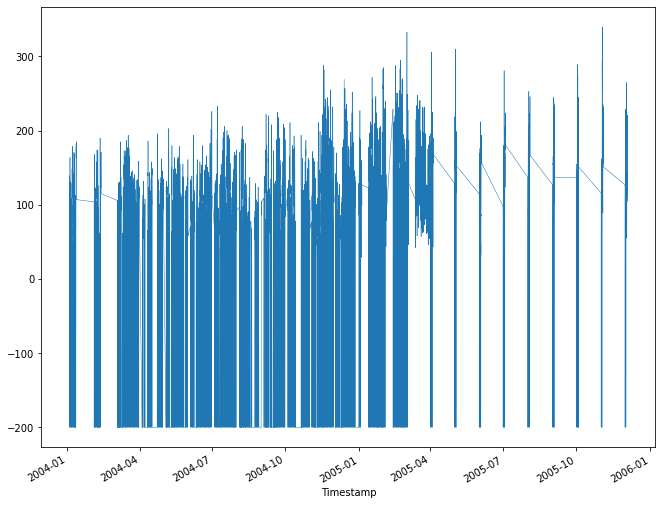

In [8]:
## Do a time series plot to look for trends
air_df["NO2(GT)"].plot(linewidth=0.5, figsize=(11, 9));

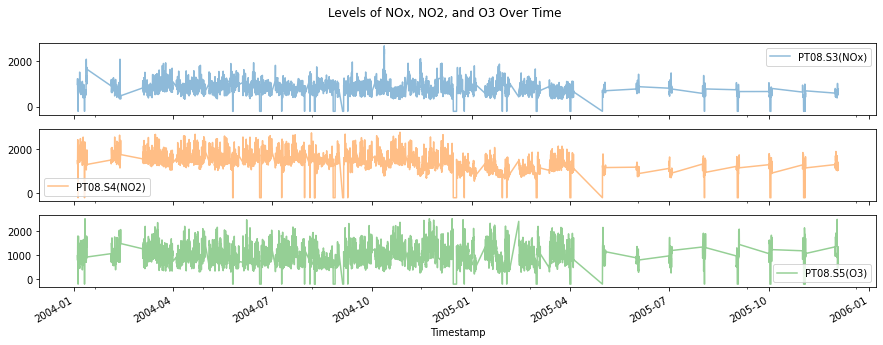

In [9]:
axes = air_df[["PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)"]].plot(
    alpha=0.5, 
    x_compat=True,
    subplots=True,
    figsize=(15, 5),
    title="Levels of NOx, NO2, and O3 Over Time"
)

In [10]:
air_df["Day"] = air_df.index.to_period("D")
air_df["Month"] = air_df.index.to_period("M")
air_df["Year"] = air_df.index.to_period("Y")

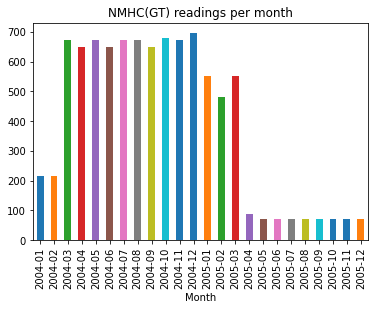

In [11]:
air_df["NMHC(GT)"].groupby(
    air_df["Month"]
).count().plot(
    kind="bar",
    title="NMHC(GT) readings per month"
)

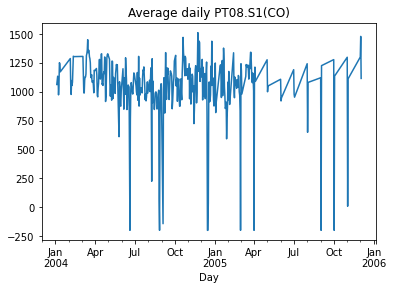

In [12]:
air_df["PT08.S1(CO)"].groupby(
    air_df["Day"]
).mean().plot(
    kind="line",
    title="Average daily PT08.S1(CO)"
)